In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import pandas as pd
from scipy import stats

In [10]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [12]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)



In [22]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [27]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [28]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_day = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f"The Last Date is {last_day[0]}")

last_year = (dt.datetime.strptime(last_day[0], '%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')
print(f"The date from one year ago is {last_year}")
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


The Last Date is 2017-08-23
The date from one year ago is 2016-08-23


The Last Date is 2017-08-23
The date from one year ago is 2016-08-23


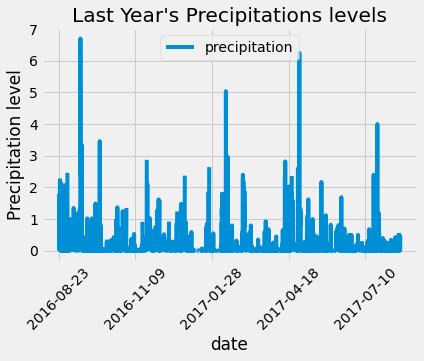

In [34]:

last_day = session.query(measurement.date). order_by(measurement.date.desc()).first()
print(f"The Last Date is {last_day[0]}")

last_year = (dt.datetime.strptime(last_day[0], '%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')
print(f"The date from one year ago is {last_year}")

measurements = (measurement.date, measurement.prcp)
precip_data = session.query(*measurements). filter(measurement.date >= last_year).all()
precip_data

precip_df = pd.DataFrame(precip_data,columns=['date', 'precipitation'])
precip_df.head()
precip_df.set_index('date', inplace=True)
precip_df = precip_df.sort_index()

ax = precip_df.plot(rot=45)
ax.set_title("Last Year's Precipitations levels");
ax.set_ylabel("Precipitation level");

In [35]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [37]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(func.count(station.id)).all()
stations


[(9)]

In [39]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)) .group_by(measurement.station). order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_station = active_stations[0][0]
most_active_station
highest_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == most_active_station).all()
highest_temp
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == most_active_station).all()
avg_temp
low_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == most_active_station).all()
low_temp

[(54.0)]

Text(0.5, 0, 'temp')

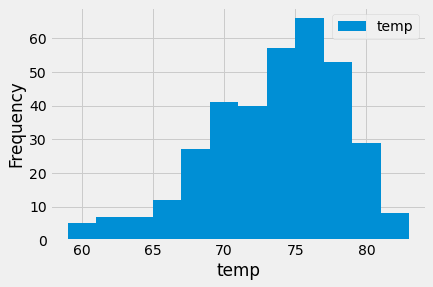

In [53]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
hist_data = session.query(measurement.tobs).filter(measurement.station == most_active_station).filter(measurement.date >= last_year).all()
hist_df = pd.DataFrame(hist_data,columns=['temp'])
hist_df.plot.hist(bins=12)
plt.xlabel('temp')

In [61]:
measurements = (measurement.date, measurement.prcp)
precip_data = session.query(*measurements).all()
session.close()
precip_dict = {}
for tple in precip_data:
    precip_dict[tple[0]]=tple[1]
print(precip_dict)

{'2010-01-01': 0.14, '2010-01-02': 0.0, '2010-01-03': 0.0, '2010-01-04': 0.0, '2010-01-06': 0.36, '2010-01-07': 0.3, '2010-01-08': 0.0, '2010-01-09': 0.0, '2010-01-10': 0.01, '2010-01-11': 0.14, '2010-01-12': 0.0, '2010-01-14': 0.0, '2010-01-15': 0.0, '2010-01-16': 0.0, '2010-01-17': 0.0, '2010-01-18': 0.0, '2010-01-19': 0.0, '2010-01-20': 0.0, '2010-01-21': 0.32, '2010-01-22': 0.0, '2010-01-23': 0.0, '2010-01-24': 0.01, '2010-01-25': 0.0, '2010-01-26': 0.03, '2010-01-27': 0.31, '2010-01-28': 0.07, '2010-01-30': 0.33, '2010-01-31': 1.1, '2010-02-01': 0.01, '2010-02-03': 0.67, '2010-02-04': 0.0, '2010-02-05': 0.09, '2010-02-06': 0.04, '2010-02-07': 0.0, '2010-02-08': 0.0, '2010-02-09': 0.0, '2010-02-11': 0.0, '2010-02-12': 0.65, '2010-02-13': 0.62, '2010-02-14': 0.02, '2010-02-15': 0.0, '2010-02-16': 0.0, '2010-02-17': 0.02, '2010-02-19': 0.42, '2010-02-20': 0.55, '2010-02-21': 0.0, '2010-02-22': None, '2010-02-23': 0.0, '2010-02-24': 0.0, '2010-02-25': 0.0, '2010-02-26': 0.01, '2010-02

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
